# GC Log Processing
#### Ellis Brown, 2021

### Specify a log file in the cell for "Path" below, then run all cells to run analysis on the gc log processing.

In [ ]:
# Overhead : For development only.
%load_ext autoreload
%autoreload 2

## Choose a file to parse. Tests selected for easy reusability

In [74]:
############### TEST SETS ##############################
from scripts import parse_log as pl
# Create gc log file by running with the following flags:
# ""-Xlog:gc*,gc+phases=debug:file=FILENAME.log"

test = "c"

if test == "a": 
    # Set the path to the file we would like to analyze
    pl.setLogPath("datasets/gc.log")
    pl.setLogSchema(1)
elif test == "b": 
    pl.setLogPath("datasets/amzn_workload_4.log")
    pl.setLogSchema(0)
elif test == "c":  
    pl.setLogPath("datasets/FLIGHT_GC.log")
    pl.setLogSchema(0)
elif test == "d":
    pl.setLogPath("datasets/long_amzn_workload.log")
    pl.setLogSchema(0)
elif test == "incomplete_test_concurrent_pauses":
    pl.setLogPath("datasets/long_a.log")
    pl.setLogSchema(0)
elif test == "linux":
    #pl.setLogPath("datasets/linux_ubuntu.log")
    pl.setLogPath("datasets/run_out.log")
    pl.setLogSchema(0)
else:
    print("UNKNOWN TEST CASE")

### Begin processing log information. Plots data and trends



Total pauses: 1116

Max wait: 181.425 ms

Total wait: 111812.308 ms

Average (mean) wait: 100.1902 ms

Total time: 3762.947

Total program runtime: 3762.947 seconds

Throughput: 97.0286%

---------------------------
Pause time in ms
---------------------------
50 th percentile:  101.041
75 th percentile:  106.1008
90 th percentile:  112.9835
95 th percentile:  117.2435
99 th percentile:  130.2306
99.9  percentile:  165.3846
99.99 percentile:  179.6471


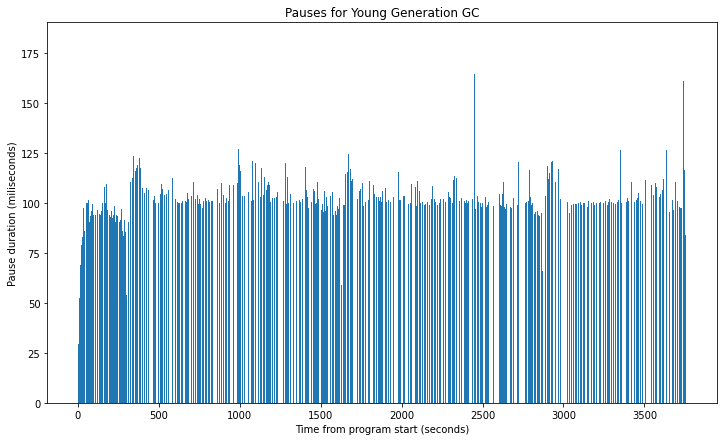

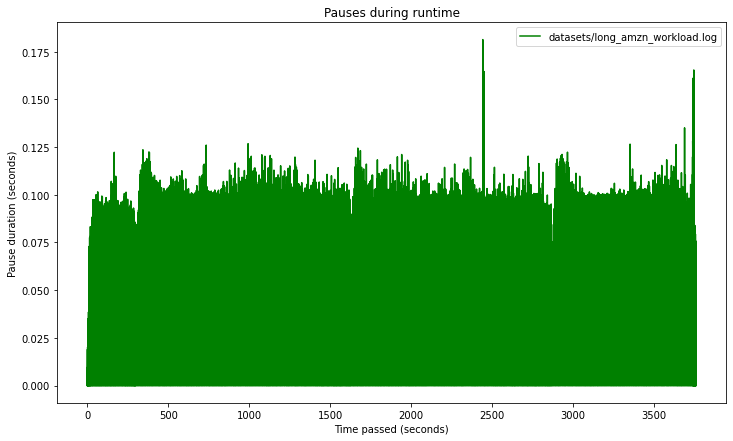

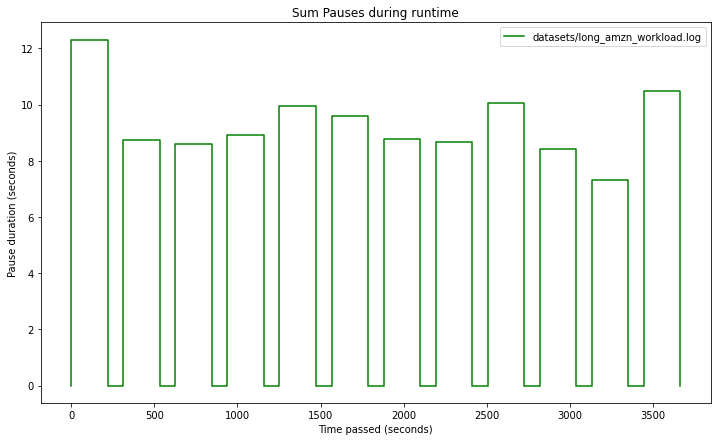

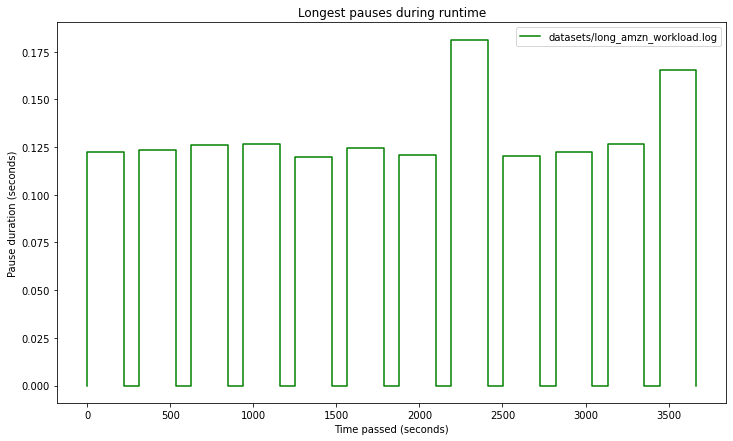

In [67]:
''' Collects information on pauses, and displays charts and metadata on pauses'''

from scripts import parse_log as pl
from scripts import plot_data as dplt
from scripts import compare_logs as cl

# Get the pauses information from file specified above
table_young_pauses = pl.getYoungPauses(create_csv = False)

if len(table_young_pauses) > 0:
    # plot bar graph for pauses , X = time, Y = pause_duration
    dplt.plot_pauses(table_young_pauses)
    
    # plot line graph for pauses, X = time, Y = time paused (Scaled)
    # NOTE: (TODO:) these files currently live in scripts/compare_logs , they should live in plot_data
    cl.setFiles([pl.getLogPath()], [str(pl.getLogPath())])
    cl.comparePauses(True, 12, 12)
    
else:
    print("No information recorded")

Heap allocation breakdown
2


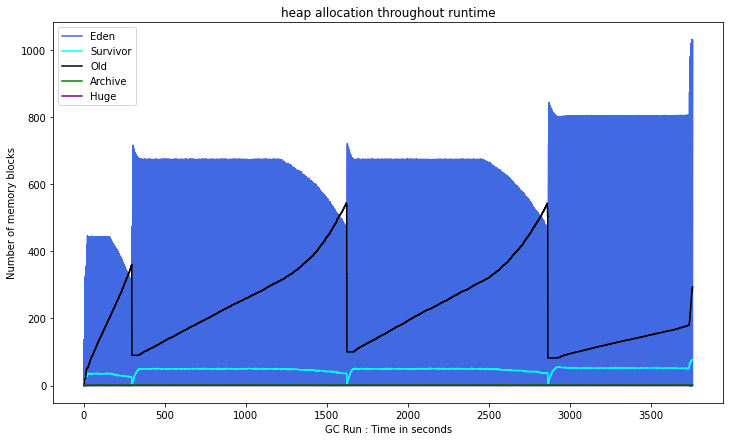

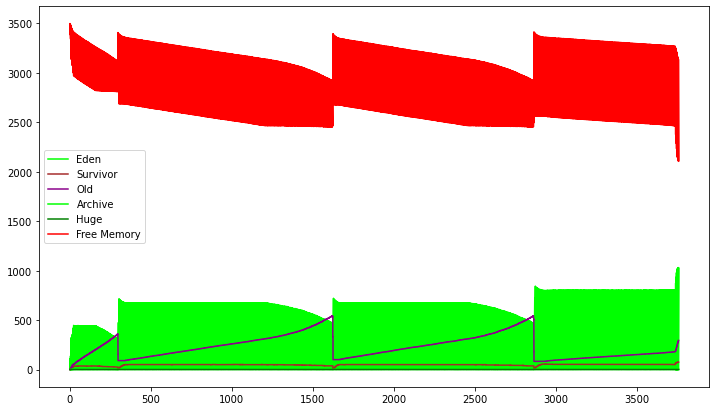

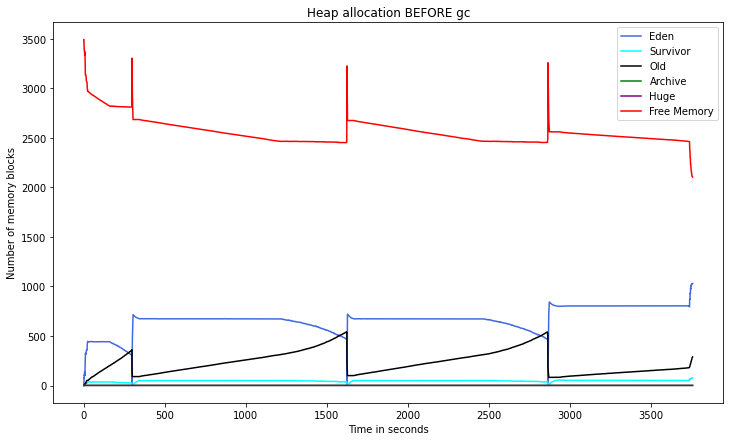

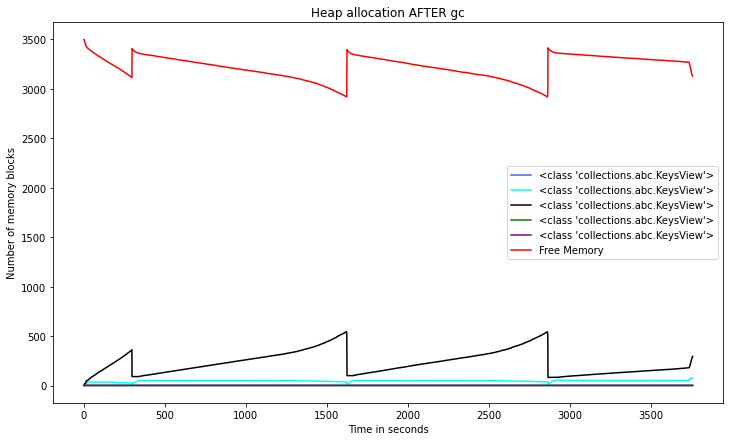

In [68]:
''' Analyze heap allocation througout the program '''
from scripts import parse_log as pl
from scripts import plot_data as dplt

#################################################
# IMPORTANT NOTE: THE CURRENT X AXIS IS NOT TIME!! (fix later)
#################################################
# remove the following 2 lines after testing.

heap_allocation_sections = pl.getHeapAllocation(create_csv = False)



if heap_allocation_sections:
    print("Heap allocation breakdown")
    print(len(heap_allocation_sections))
    # plot the data for pauses, printing to output the trends.
    dplt.plot_heap_allocation_breakdown(heap_allocation_sections, 3500)
    dplt.heap_allocation_beforeafter_gc(heap_allocation_sections, 3500)
else:
    print("No log data collected")

#TODO: Fix formatting of table & color choices


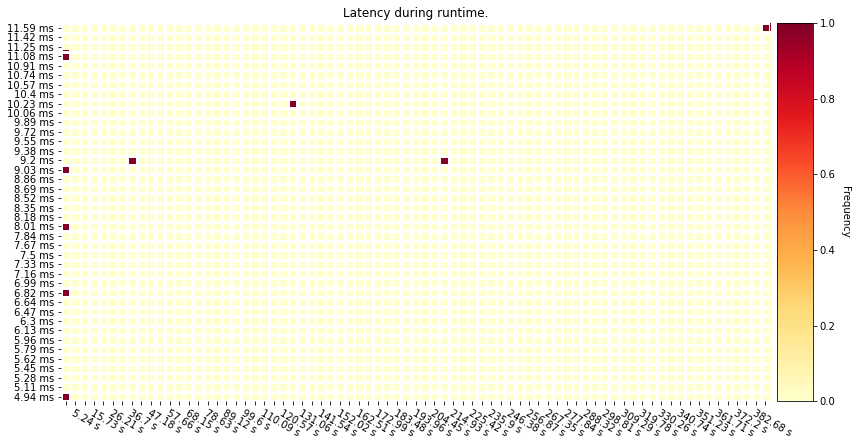

In [88]:
''' Plot a heatmap for the log file'''
from scripts import plot_data as dplt
from scripts import parse_log as pl



yp = pl.getYoungPauses()
if not yp.empty:
    dplt.plot_heatmap(yp, 75, 40, False)         # includes frequency cells
    #dplt.plot_heatmap(yp, 20, 20, False) # does not include frequency cells
else:
    print("Unable to create heatmap: no pause information collected")

In [70]:
# Get all metadata about the specific gc used
gc_metadata = pl.getGCMetadata(create_csv = False)

if gc_metadata:
    # Create graphical table from metadata
    dplt.displayMetadata(gc_metadata)
else:
    print("Metadata not collected in GC logs")

Version . . . . . . . . . . . | 16.0.1+9 (release)
CPUs  . . . . . . . . . . . . | 16 total, 16 available
Memory  . . . . . . . . . . . | 65536M
Large Page Support  . . . . . | Disabled
NUMA Support  . . . . . . . . | Disabled
Compressed Oops . . . . . . . | Enabled (Zero based)
Pre-touch . . . . . . . . . . | Disabled
Parallel Workers  . . . . . . | 13
Heap Region Size  . . . . . . | 8M
Heap Initial Capacity . . . . | 1G
Heap Max Capacity . . . . . . | 16G
Heap Min Capacity . . . . . . | 8M
Concurrent Workers  . . . . . | 3
Concurrent Refinement Workers | 13
Periodic GC . . . . . . . . . | Disabled
